Performed by: Tejas Ram Ramesh ( 2000902539 ) 

I have reffered to Professor Yuzhen Ye kaggle notebooks and also used the base code as instructed in the Question.

# Question 1

In [1]:

import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn import datasets

In [2]:
cancer_data = datasets.load_breast_cancer()  
cancer_data # just to view the data, we see that data has been returned as a Bunch    
# Bunch is a key value pair, its just like a python dictionary

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

Bunch is basically a key value pair that operates in a similar way to what a dictionary does in python. We cannot treat a Bunch as a csv file we will have to select the features we desire and then merge them in a data frame.

In [3]:
print(cancer_data.keys())
#target: Data i want to predict
#feature_names: features of the dataset
#target_name: Results to be given
#data: values of the features
#DESCR: Information about the data set.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


 Some Description of the keys we have got :         

1.   target: Data I want to predict
2.   feature_names: features of the dataset
1.   target_name: Results to be given
2.   data: values of the features
1.   DESCR: Information about the data set.


In [4]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We view this description just to get a idea of what we are dealing with.  We can see the summary statistics, class of cancer, attribute information etc

It also has the methodology used by the researher for the data collection.

In [5]:
df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# We have finally kind of made it in a form which csv gives us, so we can treat it like that now.
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We have finally kind of made it in a form which csv gives us, so we can treat it like that now. This makes our work easier its easy to manipulate this than when it was in the form of Bunch.

In [6]:
df.info()
# Just to see the data type of each feature present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Just to see the data type of each feature present

In [7]:
df = df.iloc[:,:-1]

Header has been removed

In [8]:
# Train data ( features )
X = cancer_data.data

# Test Data ( Results )
y = cancer_data.target

# Split data into test and train
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

Here we load the features into a variable X and results into Variable Y. We then split the data so that we can train the data and use the other for testing so that we get accurate results.

In [9]:
from sklearn.ensemble import BaggingClassifier

cancer_model = BaggingClassifier(base_estimator = None)
cancer_model.fit(train_X, train_y)
cancer_pred = cancer_model.predict(test_X)
print(cancer_pred)

[0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1]


Here we have imported Bagging Classifier module from sklearn.ensemble . We do not tweak the parameters initially so that we can look at its accuracy and compare it to the hyperparameter tuned results.

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#print(mean_absolute_error(test_y, cancer_pred))
print(r2_score(test_y, cancer_pred))

0.7582417582417582


Here I have evaluated the the R2 score of the Bagging Classifier model without hyper parameter tuning.

In [11]:
n_estimator = [15,25,35,45,55,65]
max_samples = [0.5,0.65,0.75,0.80,0.85,1.0]
results = []
for i in range(len(n_estimator)):
    classify = BaggingClassifier(base_estimator= None, n_estimators=n_estimator[i],max_samples = max_samples[i], random_state=0).fit(train_X, train_y)
    results.append(classify.score(test_X, test_y))
print("Scores are as follows:", results)  

Scores are as follows: [0.958041958041958, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.965034965034965, 0.965034965034965]


```
from sklearn.metrics import r2_score

preds = reg.predict(X_test)

r2_score(y_test, preds) 
```
and just use  
```.score()``` 

Because for regressors and classifiers it computes R2 score underthehood


**Results**

We can see that with increase in n_estimators and maximum samples the accuracy of the Model increases. Its not perfect but it gives acceptable results, the scope of error is low.

The BaggingClassifier with hyperparameter tuning is a great model.  Without any tuning its accuracy is way lower than result given with hyper parameter tuning (95%+ )

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

cancer_model = AdaBoostClassifier(base_estimator = None)
cancer_model.fit(train_X, train_y)
cancer_pred = cancer_model.predict(test_X)
print(cancer_pred)


[0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1]


Here we train the AdaBoost Classifier without any hyperparameter tuning.

In [13]:
from sklearn.metrics import r2_score
print(r2_score(test_y, cancer_pred))

0.7884615384615385


This is the R2 score for the AdaBoost Model without any hyperparameter tuning being done.

In [14]:
n_estimator = [15,25,35,45,55,65]
learning_rate = [0.5,0.65,0.75,0.80,0.85,1.0]
results = []
for i in range(len(n_estimator)):
    classify = AdaBoostClassifier(n_estimators=n_estimator[i], random_state=0, learning_rate = learning_rate[i]).fit(train_X,train_y)
    results.append(classify.score(test_X, test_y))
print("Scores are as follows:", results) 

Scores are as follows: [0.951048951048951, 0.9230769230769231, 0.951048951048951, 0.9300699300699301, 0.951048951048951, 0.9440559440559441]


**Results**

We can see that with increase in n_estimators and maximum samples the accuracy of the Model increases. Its not perfect but it gives acceptable results, the scope of error is low.

The AdaBoostClassifier with hyperparameter tuning is a great model.  Without any tuning its accuracy is way lower than result given with hyper parameter tuning (95%+ )

# Question 2
Have reffered to and used the base code provided by professor Yuzhen Ye

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

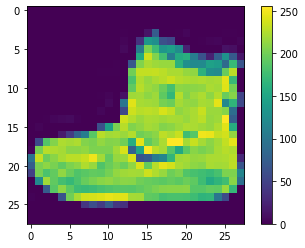

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

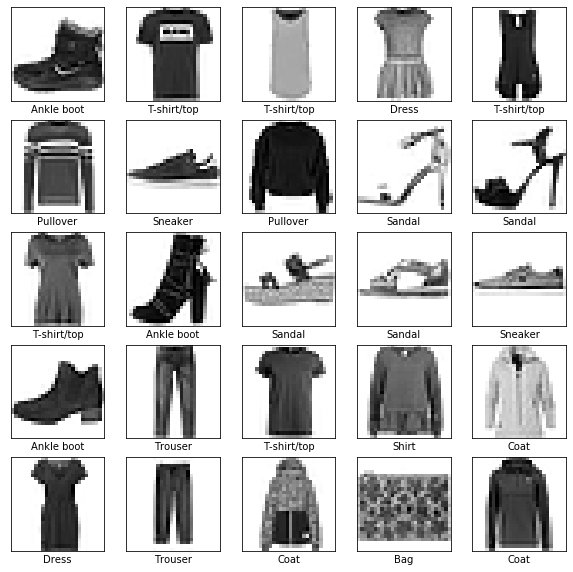

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.


#### The model used below has 128 Neurons defined in the Hidden Layers.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Compiling the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Fittig the model
model.fit(train_images, train_labels, epochs=10)
# Calculating the loss and accuracy of the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4990 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3155 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2975 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2822 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2592 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2484 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

#### The model used below has 180 Neurons defined in the Hidden Layers.

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Compiling the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Fitting the model.
model.fit(train_images, train_labels, epochs=10)
# Calculating the loss and accuracy of the model.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4885 - accuracy: 0.8281
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3713 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3326 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3086 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2901 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2751 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2520 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2419 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.232



#### As we increase the Number of Nuerons in the Hidden Layers ( Greater depth of net) we notice and increase in the accuracy of the test results

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0125 - accuracy: 0.5922
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0135 - accuracy: 0.5956
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0135 - accuracy: 0.5942
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0028 - accuracy: 0.5978
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9936 - accuracy: 0.6022
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9952 - accuracy: 0.6043
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9947 - accuracy: 0.6033
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9920 - accuracy: 0.6054
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9843 - accuracy: 0.6054
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.993

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3623 - accuracy: 0.8896

Test accuracy: 0.8895999789237976


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Using the dropout in the model.


### The model uses a Hidden Layer ( Net ) of 128 Neurons.

In [ ]:
d = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in d:
    print("Dropout: ", (i)) 
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(i),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)

Dropout:  0.0
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3761 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2687 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.90 - 7s 4ms/step - loss: 0.2461 - accuracy: 0.9073
Epoch 10/10
1875/1875 [===


#### Accuracy increased as dropout value increased from value of 0.0 to 0.3 , increased from 87 to 89%. Then Accuracy decreased as dropout value increased till dropout value 0.9, dcereased from 89% to 79%


### The model uses a Hidden Layer ( Net ) of 180 Neurons.

In [ ]:
d = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in d:
    print("Dropout: ", (i)) 
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(180, activation='relu'),
        tf.keras.layers.Dropout(i),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)

Dropout:  0.0
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4901 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3707 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3306 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3050 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2877 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2753 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2497 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2405 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step



#### Accuracy increased as dropout value increased from value of 0.1 to 0.5 , increased from 87 to 87.81%. Then Accuracy decreased as dropout value increased till dropout value 0.9, dcereased from 82.31%

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([6.5085879e-07, 5.2581700e-10, 8.3045848e-08, 3.2599687e-10,
       2.8988802e-09, 3.5434702e-04, 6.0141261e-08, 7.7520631e-02,
       3.8161107e-07, 9.2212391e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

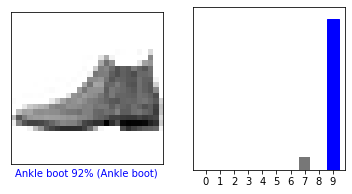

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

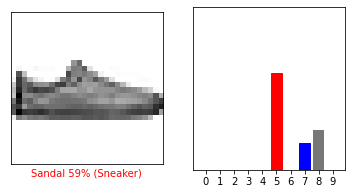

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

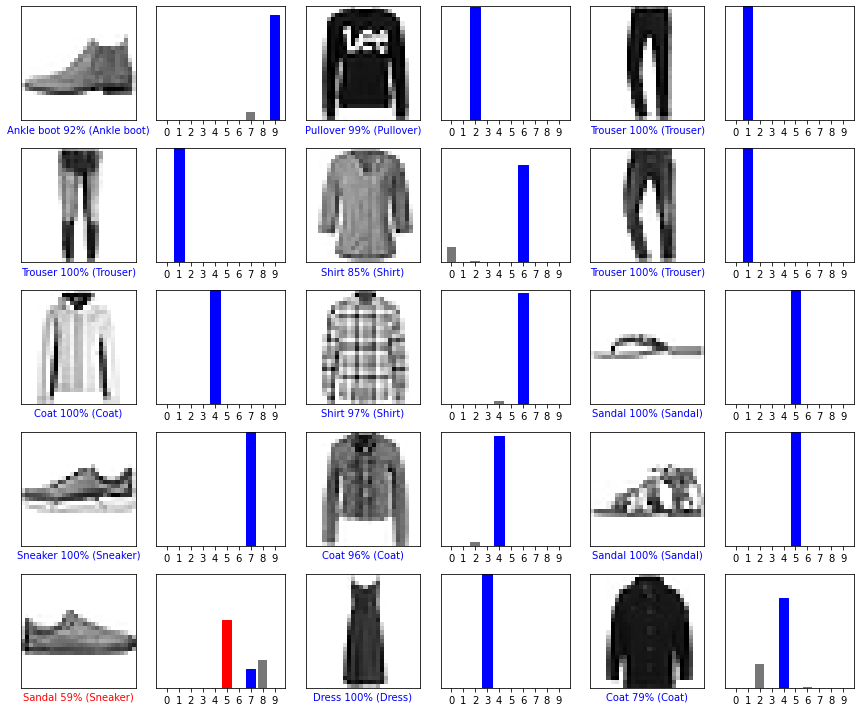

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3390121e-05 2.7580459e-11 9.9282724e-01 3.6897457e-10 6.5028477e-03
  1.2947186e-14 6.5654510e-04 3.2983552e-15 2.3508933e-11 3.1103280e-13]]


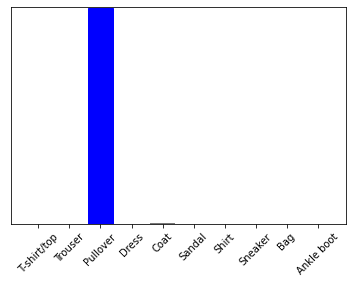

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

#### Implementing the CNN for the given ANN.

In [ ]:
import keras
from keras.layers import Conv2D

In [ ]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape = (28,28,1), padding='valid',
    data_format="channels_last", dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None
),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Reshaping the training and test images to make it fit to the model.

In [ ]:
train_images = tf.reshape(train_images, shape=[-1, 28, 28, 1])
test_images = tf.reshape(test_images, shape=[-1, 28, 28, 1])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0258 - accuracy: 0.5908
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0244 - accuracy: 0.5897
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0084 - accuracy: 0.5975
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9997 - accuracy: 0.6042
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9922 - accuracy: 0.6044
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9939 - accuracy: 0.6069
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9858 - accuracy: 0.6058
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9925 - accuracy: 0.6060
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9841 - accuracy: 0.6109
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.985

#### The model is trained for 10 epochs ( to and fro of the net) and the accuracy for the CNN model is roughly around 82 percent.